In [1]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
from get_data import get_data
from train import train,score
import pandas as pd
import seaborn as sns
from tqdm.notebook import trange, tqdm
from model import LogisticRegression,ComplementNB,BernoulliNB
from model import OnehotTransformer,LogisticRegressionPytorch,LangID

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Device used = cuda


In [ ]:
ns = [10,50,100,500, 2000]
augs = [4,8,16,32,64]


Xt, Yt = get_data(data_type="dev",cleanText=True)

length = len(ns)*len(augs)
data = {"n":[0]*length,
       "augs":[0]*length,
       "score":[0.0]*length,
       "runs":[0]*length}
df = pd.DataFrame(data)

i = 0
for n in tqdm(ns):
    
    X,Y = get_data(f"clean_n_{n}",early_return=False)

    transformer = OnehotTransformer(ngram_range=(1, 1), min_df=0.0005, max_df=.5, verbose_vocab=True, max_features=9999)
    transformer.fit(X,Y)
    X = transformer.transform(X)

    model = LangID(vocab_dim=len(X[0]),epochs=3,progress_bar=False)
    success = False
    batch_sizes = [4096,2048,1024,512,256,128,64]
    z = 0
    while not success:
        try:
            batch_size = min(int(len(X)*0.2)-1, batch_sizes[z])
            if batch_size < 10:
                batch_size = 10
            model.train_(X, Y, batch_size=batch_size)
            success=True
        except:
            z+=1
    acc = model.score(transformer.transform(Xt),Yt)
    df.at[i,"n"] = n
    df.at[i,"score"] = acc
    i+=1
    for aug in augs:
        #print(f"\neda_augs_{aug}_n_{n}")
        if aug == 64 and n == 2000:
            continue
        X,Y = get_data(data_type=f"clean_eda_augs_{aug}_n_{n}")
        max_features = 99999
        transformer = OnehotTransformer(ngram_range=(1, 1), min_df=0.0005, max_df=.5, verbose_vocab=True, max_features=max_features)
        transformer.fit(X,Y)
        X = transformer.transform(X)

        model = model = LangID(vocab_dim=len(X[0]),epochs=3,progress_bar=False)
        batch_sizes = [4096,2048,1024,512,256,128,64]
        z = 0
        success=False
        while not success:
            try:
                batch_size = min(int(len(X)*0.2)-1, batch_sizes[z])
                if batch_size < 10:
                    batch_size = 10
                model.train_(X, Y, batch_size=batch_size)
                success=True
            except:
                z+=1

        acc = model.score(transformer.transform(Xt),Yt)
        df.at[i,"n"] = n
        df.at[i, "augs"] = aug
        df.at[i,"score"] = acc
        i+=1

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted vocab size: 180
Fitted vocab size: 290
Fitted vocab size: 327
Fitted vocab size: 396
Fitted vocab size: 499
Fitted vocab size: 659
Fitted vocab size: 940
Fitted vocab size: 1582
Fitted vocab size: 1808
Fitted vocab size: 2180


In [22]:
df.sort_values(by=['n', 'augs'])

,n,augs,score,runs
23,10.0,0.0,0.569,0.0
28,10.0,4.0,0.607,NaN
27,10.0,8.0,0.610,NaN
26,10.0,16.0,0.612,NaN
25,10.0,32.0,0.608,NaN
24,10.0,64.0,0.598,0.0
17,50.0,0.0,0.717,0.0
22,50.0,4.0,0.703,0.0
21,50.0,8.0,0.691,0.0
20,50.0,16.0,0.699,0.0


In [19]:
df.to_csv("EDA_results_LSTM.csv")

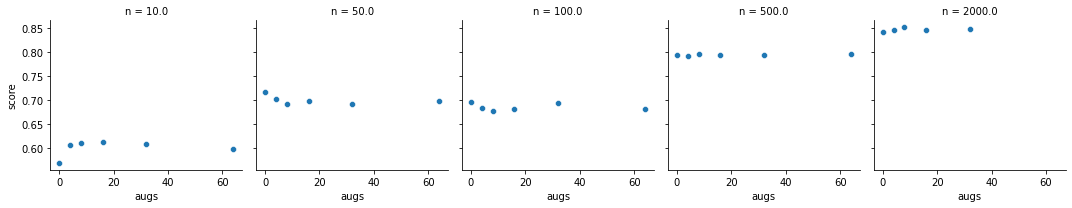

In [21]:
g = sns.FacetGrid(df,col="n")
g.map(sns.scatterplot,"augs","score")

In [22]:
X,Y = get_data(f"clean_n_{100}",early_return=False)
transformer = OnehotTransformer(ngram_range=(1, 1), min_df=1, max_df=.1, verbose_vocab=True)
set(OnehotTransformer(ngram_range=(1, 1), min_df=1, max_df=1., verbose_vocab=True).fit(X).vocab) - set(OnehotTransformer(ngram_range=(1, 1), min_df=1, max_df=.33, verbose_vocab=True).fit(X).vocab)

Fitted vocab size: 1291
Fitted vocab size: 1282


{'and', 'is', 'it', 'not', 'of', 'song', 'the', 'this', 'to'}

In [9]:
for n in tqdm(ns):
    
    X,Y = get_data(f"clean_n_{n}",early_return=False)
#     model = LogisticRegression(max_iter=100)
#     model = BernoulliNB()
    print(f"n original",len(Y))
    i+=1
    for aug in augs:
        #print(f"\neda_augs_{aug}_n_{n}")
        
        X,Y = get_data(data_type=f"clean_eda_augs_{aug}_n_{n}")
        print(f"n{n}, aug{aug}, eda length",len(Y))

  0%|          | 0/5 [00:00<?, ?it/s]

n original 10
n10, aug4, eda length 50
n10, aug8, eda length 90
n10, aug16, eda length 170
n10, aug32, eda length 330
n10, aug64, eda length 650
n original 50
n50, aug4, eda length 250
n50, aug8, eda length 450
n50, aug16, eda length 850
n50, aug32, eda length 1650
n50, aug64, eda length 3250
n original 100
n100, aug4, eda length 500
n100, aug8, eda length 900
n100, aug16, eda length 1700
n100, aug32, eda length 3300
n100, aug64, eda length 6500
n original 500
n500, aug4, eda length 2500
n500, aug8, eda length 4500
n500, aug16, eda length 8500
n500, aug32, eda length 16500
n500, aug64, eda length 32500
n original 2000
n2000, aug4, eda length 10000
n2000, aug8, eda length 18000
n2000, aug16, eda length 34000
n2000, aug32, eda length 66000
n2000, aug64, eda length 130000
